In [349]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [350]:
data = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv")

In [351]:
data = data[data["location"] == "India"]

In [352]:
data.head

<bound method NDFrame.head of       iso_code continent location        date  total_cases  new_cases  \
15134      IND      Asia    India  2019-12-31          0.0        0.0   
15135      IND      Asia    India  2020-01-01          0.0        0.0   
15136      IND      Asia    India  2020-01-02          0.0        0.0   
15137      IND      Asia    India  2020-01-03          0.0        0.0   
15138      IND      Asia    India  2020-01-04          0.0        0.0   
...        ...       ...      ...         ...          ...        ...   
15353      IND      Asia    India  2020-08-07    2027074.0    62538.0   
15354      IND      Asia    India  2020-08-08    2088611.0    61537.0   
15355      IND      Asia    India  2020-08-09    2153010.0    64399.0   
15356      IND      Asia    India  2020-08-10    2215074.0    62064.0   
15357      IND      Asia    India  2020-08-11    2268675.0    53601.0   

       total_deaths  new_deaths  total_cases_per_million  \
15134           0.0         0.0  

In [353]:
cols = data.columns
num_cols = data._get_numeric_data().columns
# list(num_cols)

In [354]:
categorical = list(set(cols) - set(num_cols))
# list(set(cols) - set(num_cols))

In [355]:
data.isnull().any()

iso_code                           False
continent                          False
location                           False
date                               False
total_cases                        False
new_cases                          False
total_deaths                       False
new_deaths                         False
total_cases_per_million            False
new_cases_per_million              False
total_deaths_per_million           False
new_deaths_per_million             False
new_tests                           True
total_tests                         True
total_tests_per_thousand            True
new_tests_per_thousand              True
new_tests_smoothed                  True
new_tests_smoothed_per_thousand     True
tests_per_case                      True
positive_rate                       True
tests_units                         True
stringency_index                    True
population                         False
population_density                 False
median_age      

In [356]:
data.shape

(224, 36)

In [357]:
null_columns=data.columns[data.isnull().any()]
data[null_columns].isnull().sum()

new_tests                          91
total_tests                        85
total_tests_per_thousand           85
new_tests_per_thousand             91
new_tests_smoothed                 80
new_tests_smoothed_per_thousand    80
tests_per_case                     80
positive_rate                      80
tests_units                        73
stringency_index                    5
dtype: int64

In [358]:
for i in null_columns:
    if(data[i].isnull().sum()>data.shape[0]/2):
        data[i].drop

In [359]:
data.shape

(224, 36)

In [360]:
numerical_column = ["total_tests_per_thousand","new_tests_per_thousand","new_tests_smoothed_per_thousand"]
ordinal_column = [i for i in list(null_columns) if i not in numerical_column]
categorical_column = [i for i in list(null_columns) if i in categorical]

In [361]:
for i in numerical_column:
    temp = data[i]
    temp = temp.fillna(temp.mean(),inplace = True)
    
for i in ordinal_column:
    temp = data[i]
    temp = temp.fillna(temp.mode()[0],inplace = True)
    
for i in categorical_column:
    temp = data[i]
    temp = temp.fillna(temp.mode()[0],inplace = True)

In [362]:
data.isna().sum()

iso_code                           0
continent                          0
location                           0
date                               0
total_cases                        0
new_cases                          0
total_deaths                       0
new_deaths                         0
total_cases_per_million            0
new_cases_per_million              0
total_deaths_per_million           0
new_deaths_per_million             0
new_tests                          0
total_tests                        0
total_tests_per_thousand           0
new_tests_per_thousand             0
new_tests_smoothed                 0
new_tests_smoothed_per_thousand    0
tests_per_case                     0
positive_rate                      0
tests_units                        0
stringency_index                   0
population                         0
population_density                 0
median_age                         0
aged_65_older                      0
aged_70_older                      0
g

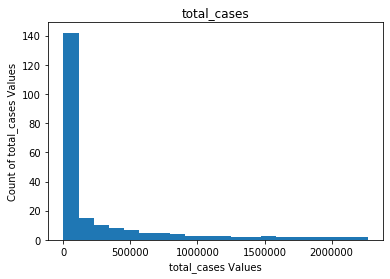

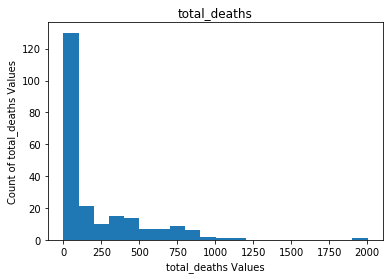

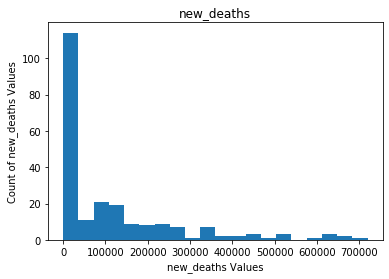

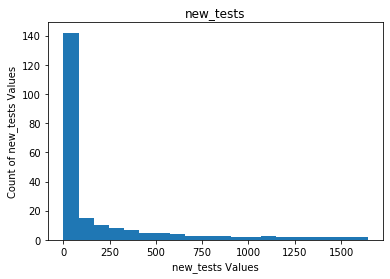

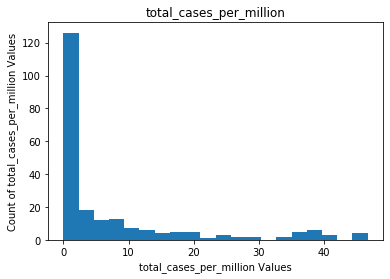

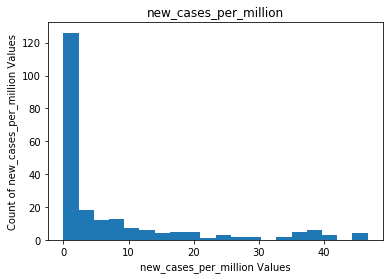

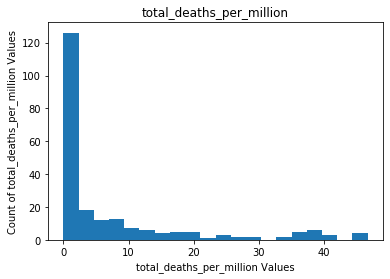

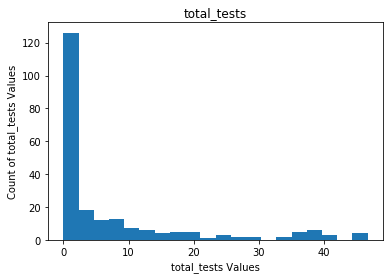

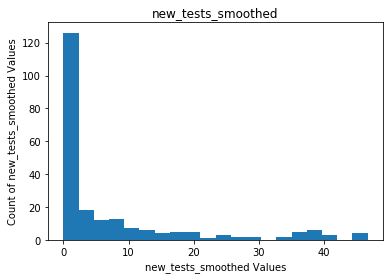

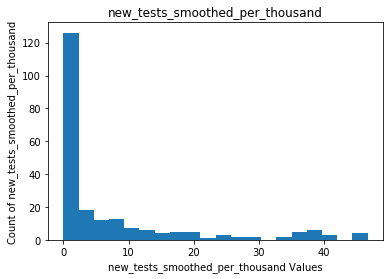

<Figure size 432x288 with 0 Axes>

In [363]:
a=data["total_cases"]
b=data["total_deaths"]
c=data["new_deaths"]
d=data["new_tests"]
e=data["total_cases_per_million"]
f=data["new_cases_per_million"]
g=data["total_deaths_per_million"]
h=data["total_tests"]
i=data["new_tests_smoothed"]
j=data["new_tests_smoothed_per_thousand"]

title="total_cases"
plt.title(title)
plt.hist(a,bins=20)
plt.xlabel("total_cases Values")
plt.ylabel("Count of total_cases Values")
plt.show()
plt.clf()

title="total_deaths"
plt.title(title)
plt.hist(c,bins=20)
plt.xlabel("total_deaths Values")
plt.ylabel("Count of total_deaths Values")
plt.show()
plt.clf()

title="new_deaths"
plt.title(title)
plt.hist(d,bins=20)
plt.xlabel("new_deaths Values")
plt.ylabel("Count of new_deaths Values")
plt.show()
plt.clf()

title="new_tests"
plt.title(title)
plt.hist(e,bins=20)
plt.xlabel("new_tests Values")
plt.ylabel("Count of new_tests Values")
plt.show()
plt.clf()

title="total_cases_per_million"
plt.title(title)
plt.hist(f,bins=20)
plt.xlabel("total_cases_per_million Values")
plt.ylabel("Count of total_cases_per_million Values")
plt.show()
plt.clf()

title="new_cases_per_million"
plt.title(title)
plt.hist(f,bins=20)
plt.xlabel("new_cases_per_million Values")
plt.ylabel("Count of new_cases_per_million Values")
plt.show()
plt.clf()

title="total_deaths_per_million"
plt.title(title)
plt.hist(f,bins=20)
plt.xlabel("total_deaths_per_million Values")
plt.ylabel("Count of total_deaths_per_million Values")
plt.show()
plt.clf()

title="total_tests"
plt.title(title)
plt.hist(f,bins=20)
plt.xlabel("total_tests Values")
plt.ylabel("Count of total_tests Values")
plt.show()
plt.clf()

title="new_tests_smoothed"
plt.title(title)
plt.hist(f,bins=20)
plt.xlabel("new_tests_smoothed Values")
plt.ylabel("Count of new_tests_smoothed Values")
plt.show()
plt.clf()

title="new_tests_smoothed_per_thousand"
plt.title(title)
plt.hist(f,bins=20)
plt.xlabel("new_tests_smoothed_per_thousand Values")
plt.ylabel("Count of new_tests_smoothed_per_thousand")
plt.show()
plt.clf()

In [364]:
data.mean()

total_cases                        3.007952e+05
new_cases                          1.012801e+04
total_deaths                       7.432161e+03
new_deaths                         2.020402e+02
total_cases_per_million            2.179668e+02
new_cases_per_million              7.339112e+00
total_deaths_per_million           5.385612e+00
new_deaths_per_million             1.463973e-01
new_tests                          1.092096e+05
total_tests                        3.940232e+06
total_tests_per_thousand           4.598374e+00
new_tests_per_thousand             1.332256e-01
new_tests_smoothed                 1.019910e+05
new_tests_smoothed_per_thousand    1.145069e-01
tests_per_case                     1.504472e+01
positive_rate                      5.817857e-02
stringency_index                   5.718513e+01
population                         1.380004e+09
population_density                 4.504190e+02
median_age                         2.820000e+01
aged_65_older                      5.989

In [365]:
data.median()

total_cases                        1.929200e+04
new_cases                          1.390000e+03
total_deaths                       6.150000e+02
new_deaths                         4.200000e+01
total_cases_per_million            1.397950e+01
new_cases_per_million              1.007500e+00
total_deaths_per_million           4.460000e-01
new_deaths_per_million             3.050000e-02
new_tests                          2.958450e+04
total_tests                        3.868545e+05
total_tests_per_thousand           4.598374e+00
new_tests_per_thousand             1.332256e-01
new_tests_smoothed                 2.946450e+04
new_tests_smoothed_per_thousand    1.145069e-01
tests_per_case                     1.049100e+01
positive_rate                      4.300000e-02
stringency_index                   7.639000e+01
population                         1.380004e+09
population_density                 4.504190e+02
median_age                         2.820000e+01
aged_65_older                      5.989

In [366]:
data.mode()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,IND,Asia,India,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
1,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,NaN,NaN,NaN,2020-08-07,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
220,NaN,NaN,NaN,2020-08-08,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
221,NaN,NaN,NaN,2020-08-09,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
222,NaN,NaN,NaN,2020-08-10,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


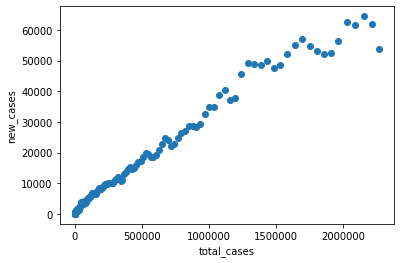

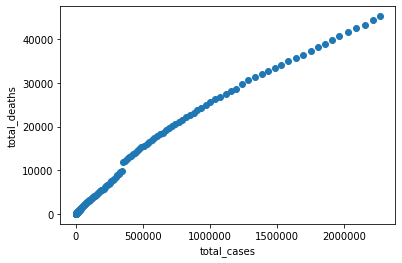

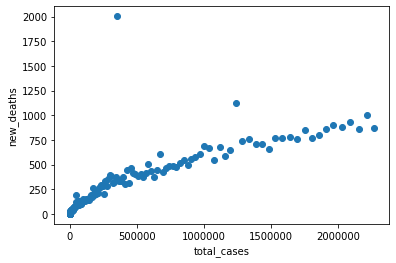

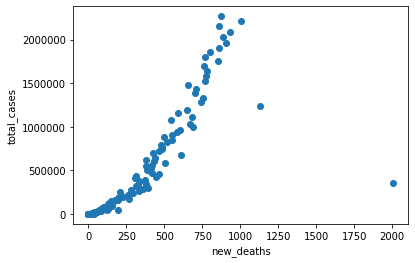

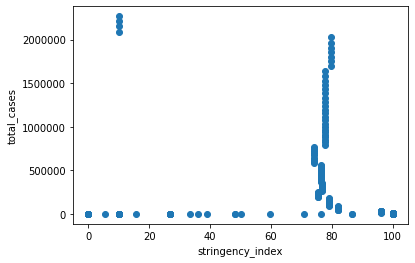

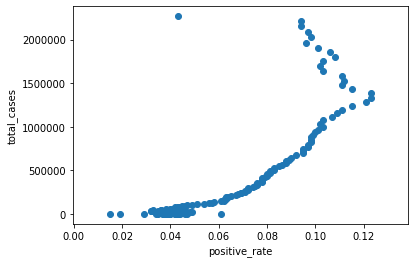

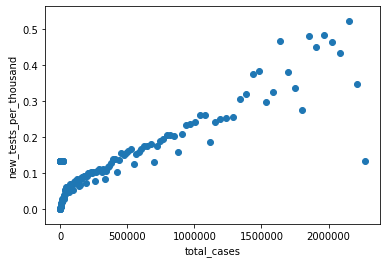

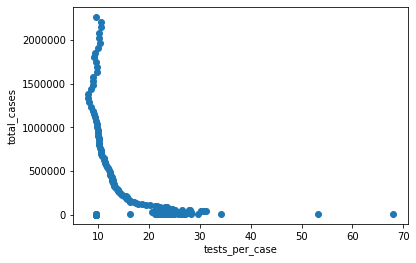

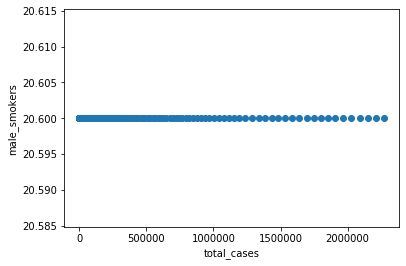

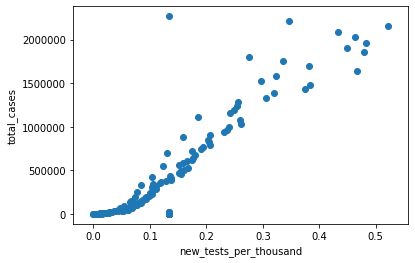

<Figure size 432x288 with 0 Axes>

In [367]:
plt.scatter(data['total_cases'],data['new_cases'])
plt.xlabel('total_cases')
plt.ylabel('new_cases')
plt.show()
plt.clf()
      

plt.scatter(data['total_cases'],data['total_deaths'])
plt.xlabel('total_cases')
plt.ylabel('total_deaths')
plt.show()
plt.clf()


plt.scatter(data['total_cases'],data['new_deaths'])
plt.xlabel('total_cases')
plt.ylabel('new_deaths')
plt.show()
plt.clf()
            
plt.scatter(data['new_deaths'],data['total_cases'])
plt.xlabel('new_deaths')
plt.ylabel('total_cases')
plt.show()
plt.clf()

plt.scatter(data['stringency_index'],data['total_cases'])
plt.xlabel('stringency_index')
plt.ylabel('total_cases')
plt.show()
plt.clf()

plt.scatter(data['positive_rate'],data['total_cases'])
plt.xlabel('positive_rate')
plt.ylabel('total_cases')
plt.show()
plt.clf()

plt.scatter(data['total_cases'],data['new_tests_per_thousand'])
plt.xlabel('total_cases')
plt.ylabel('new_tests_per_thousand')
plt.show()
plt.clf()

plt.scatter(data['tests_per_case'],data['total_cases'])
plt.xlabel('tests_per_case')
plt.ylabel('total_cases')
plt.show()
plt.clf()

plt.scatter(data['total_cases'],data['male_smokers'])
plt.xlabel('total_cases')
plt.ylabel('male_smokers')
plt.show()
plt.clf()

plt.scatter(data['new_tests_per_thousand'],data['total_cases'])
plt.xlabel('new_tests_per_thousand')
plt.ylabel('total_cases')
plt.show()
plt.clf()

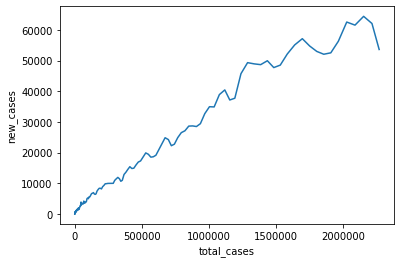

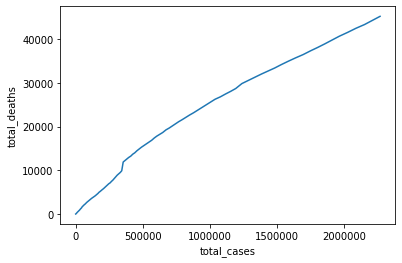

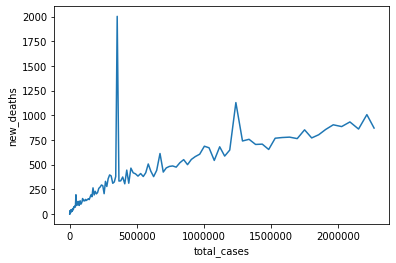

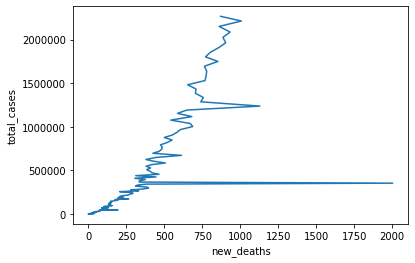

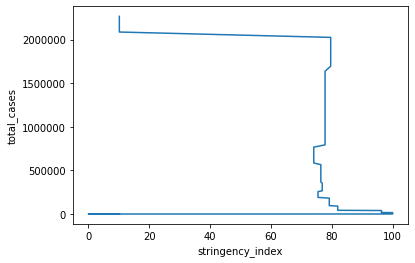

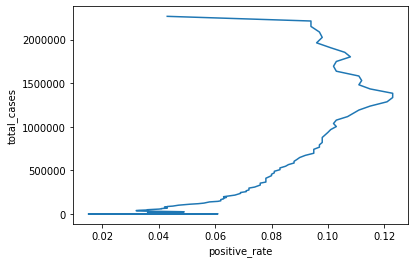

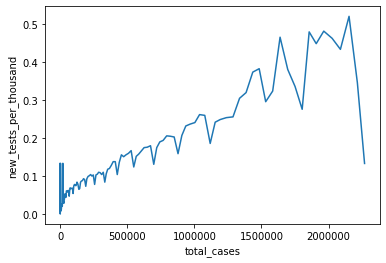

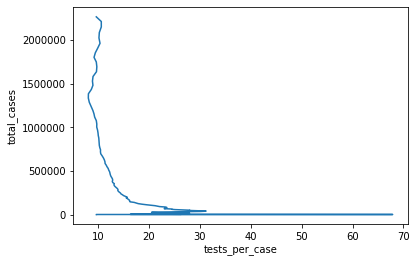

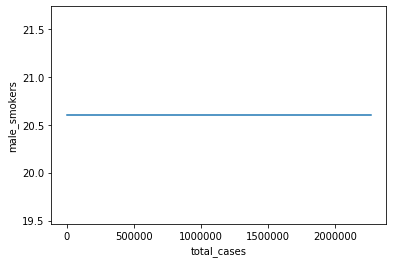

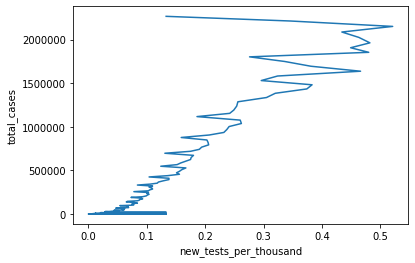

<Figure size 432x288 with 0 Axes>

In [368]:
plt.plot(data['total_cases'],data['new_cases'])
plt.xlabel('total_cases')
plt.ylabel('new_cases')
plt.show()
plt.clf()
      

plt.plot(data['total_cases'],data['total_deaths'])
plt.xlabel('total_cases')
plt.ylabel('total_deaths')
plt.show()
plt.clf()


plt.plot(data['total_cases'],data['new_deaths'])
plt.xlabel('total_cases')
plt.ylabel('new_deaths')
plt.show()
plt.clf()
            
plt.plot(data['new_deaths'],data['total_cases'])
plt.xlabel('new_deaths')
plt.ylabel('total_cases')
plt.show()
plt.clf()

plt.plot(data['stringency_index'],data['total_cases'])
plt.xlabel('stringency_index')
plt.ylabel('total_cases')
plt.show()
plt.clf()

plt.plot(data['positive_rate'],data['total_cases'])
plt.xlabel('positive_rate')
plt.ylabel('total_cases')
plt.show()
plt.clf()

plt.plot(data['total_cases'],data['new_tests_per_thousand'])
plt.xlabel('total_cases')
plt.ylabel('new_tests_per_thousand')
plt.show()
plt.clf()

plt.plot(data['tests_per_case'],data['total_cases'])
plt.xlabel('tests_per_case')
plt.ylabel('total_cases')
plt.show()
plt.clf()

plt.plot(data['total_cases'],data['male_smokers'])
plt.xlabel('total_cases')
plt.ylabel('male_smokers')
plt.show()
plt.clf()

plt.plot(data['new_tests_per_thousand'],data['total_cases'])
plt.xlabel('new_tests_per_thousand')
plt.ylabel('total_cases')
plt.show()
plt.clf()

# 6. Convert date column to ordinal

In [402]:
import datetime as dt

In [403]:
data["date"]=pd.to_datetime(data["date"])
data["date"]=data["date"].map(dt.datetime.toordinal)

In [404]:
data.head(5)

,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,new_tests,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
15134,719163,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,157.0,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
15135,719163,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,157.0,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
15136,719163,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,157.0,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
15137,719163,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,157.0,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
15138,719163,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,157.0,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66


# 7. Drop useless categorical columns, and convert useful categorical to numerical by labelencoder

In [372]:
data = data.drop(['iso_code','continent','location','tests_units'],axis = 1)

In [373]:
data.head(5)

,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,new_tests,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
15134,737424,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,157.0,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
15135,737425,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,157.0,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
15136,737426,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,157.0,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
15137,737427,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,157.0,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
15138,737428,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,157.0,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66


# 8. Select “total_cases” column as the target variable

In [379]:
target = data['total_cases'].values

# 9. Select the other columns as the features

In [381]:
X = data.drop(['total_cases'],axis = 1).values

# 10. Perform train-test split


In [382]:
from sklearn.model_selection import train_test_split

In [384]:
X_train,X_test,y_train,y_test = train_test_split(X,target,test_size = 0.2,random_state = 42)

# 11. Modelling:
### a. Linear Regression

In [388]:
from sklearn.linear_model import LinearRegression

In [389]:
lr = LinearRegression()

In [390]:
lr.fit(X_train,y_train)

LinearRegression()

### b. Random Forest Regressor

In [391]:
from sklearn.ensemble import RandomForestRegressor

In [392]:
rfr = RandomForestRegressor()

In [393]:
rfr.fit(X_train,y_train)

RandomForestRegressor()

# 12. Get accuracy

In [394]:
lr.score(X_test,y_test)*100

99.99999999992507

In [395]:
rfr.score(X_test,y_test)*100

99.86843716581359

# 13. Predict Total case for a new date

In [419]:
new_data = pd.read_csv("test_data.csv")

In [420]:
new_data

,iso_code,continent,location,date,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,IND,Asia,India,2020-08-12,64399.0,43379.0,861.0,1560.147,46.666,31.434,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
1,IND,Asia,India,2020-08-13,62064.0,44386.0,1007.0,1605.121,44.974,32.164,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66


In [421]:
new_data = new_data.drop(['iso_code','continent','location','tests_units'],axis = 1)

In [422]:
new_data

,date,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,new_tests,total_tests,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,2020-08-12,64399.0,43379.0,861.0,1560.147,46.666,31.434,0.624,719364.0,24106535.0,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
1,2020-08-13,62064.0,44386.0,1007.0,1605.121,44.974,32.164,0.730,477023.0,24583558.0,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66


In [423]:
new_data["date"]=pd.to_datetime(new_data["date"])
new_data["date"]=new_data["date"].map(dt.datetime.toordinal)

In [424]:
new_data

,date,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,new_tests,total_tests,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,737649,64399.0,43379.0,861.0,1560.147,46.666,31.434,0.624,719364.0,24106535.0,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
1,737650,62064.0,44386.0,1007.0,1605.121,44.974,32.164,0.730,477023.0,24583558.0,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66


In [425]:
lr.predict(new_data)

array([2153010.25813236, 2215074.24759256])

In [426]:
rfr.predict(new_data)

array([2061995.36, 2137512.42])